## Decision Tree Model
In this notebook we will run a decision tree model to .

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pipeline as p
from geopandas import GeoDataFrame

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Maca\Documents\project_ml\Project-Machine-Learning-CAPP\Data-Cleaning\verified.csv")

In [3]:
df.columns

Index(['bot', 'verified', 'geo_enabled', 'default_profile', 'has_description',
       'len_en', 'followers', 'friends', 'listed_count', 'likes', 'tweets'],
      dtype='object')

In [4]:
df.describe()

,bot,verified,geo_enabled,default_profile,has_description,len_en,followers,friends,listed_count,likes,tweets
count,55721.000000,55721.000000,55721.000000,55721.000000,55721.000000,55721.000000,5.572100e+04,5.572100e+04,55721.000000,55721.000000,5.572100e+04
mean,0.787656,0.057267,0.138314,0.815240,0.484880,0.886650,5.822340e+04,1.295441e+03,180.588844,3437.030635,7.345929e+03
std,0.408970,0.232355,0.345232,0.388106,0.499776,0.317024,1.479855e+06,2.122774e+04,3935.985596,16481.195534,4.182673e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+01
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,2.000000e+01,0.000000,0.000000,3.900000e+01
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000e+01,2.330000e+02,0.000000,242.000000,3.840000e+02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.069380e+08,2.141379e+06,606500.000000,886115.000000,2.766520e+06


In [5]:
#Found the NaN values for each column
for i in df.columns:
    print("Found {} NaN {} records.".format(df[i].isna().sum(), i))

Found 0 NaN bot records.
Found 0 NaN verified records.
Found 0 NaN geo_enabled records.
Found 0 NaN default_profile records.
Found 0 NaN has_description records.
Found 0 NaN len_en records.
Found 0 NaN followers records.
Found 0 NaN friends records.
Found 0 NaN listed_count records.
Found 0 NaN likes records.
Found 0 NaN tweets records.


In [6]:
#Split
df_train, df_test = p.split(df)

Total data before split: 55721
Train size data: 44576
Test size data: 11145


In [7]:
#Define features and target
covid_columns = ['followers', 'friends', 'tweets', 'likes', 'verified', 'has_description', 'geo_enabled']
labels = df_train.loc[:, covid_columns].columns.values
train_target = df_train.loc[:, 'bot']
train_features = df_train.loc[:, covid_columns]
test_target = df_test.loc[:, 'bot']
test_features = df_test.loc[:, covid_columns]

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
seed=0
k=10
# Decision Tree by the function
dt = DecisionTreeClassifier(random_state=seed)

params = {'criterion':['entropy', 'gini'], 'max_depth':[1,3,5], 'min_samples_split':[2,5,10, 20]}

grid_tree = GridSearchCV(estimator=dt, param_grid=params,
                   cv=k, return_train_score=True,
                   scoring = ['accuracy', 'precision', 'recall'],
                   refit='precision')

grid_tree.fit(train_features, train_target)
cv_results = pd.DataFrame(grid_tree.cv_results_)

In [9]:
columns = ['param_criterion','param_max_depth', 'param_min_samples_split', 
                   'rank_test_accuracy', 'mean_test_accuracy', 'mean_test_precision',
                   'mean_test_recall', 'rank_test_precision']
results = cv_results.sort_values(by='rank_test_precision', ascending=True)
results = results[columns]
results.head()

,param_criterion,param_max_depth,param_min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_precision,mean_test_recall,rank_test_precision
19,gini,3,20,13,0.939093,0.977219,0.944729,1
18,gini,3,10,13,0.939093,0.977219,0.944729,1
17,gini,3,5,13,0.939093,0.977219,0.944729,1
16,gini,3,2,13,0.939093,0.977219,0.944729,1
23,gini,5,20,3,0.945397,0.971954,0.958397,5


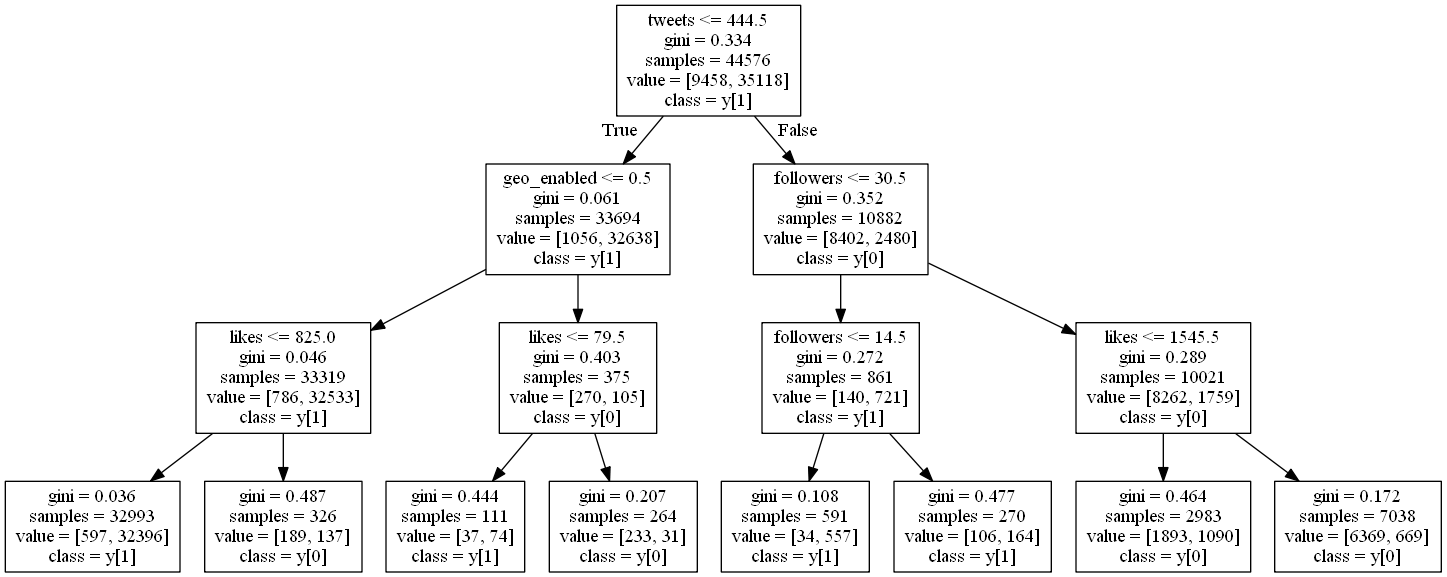

In [10]:
from sklearn import tree
import pydotplus
from IPython.display import Image

best = grid_tree.best_estimator_
dot_data = tree.export_graphviz(best, out_file=None, feature_names=labels, class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

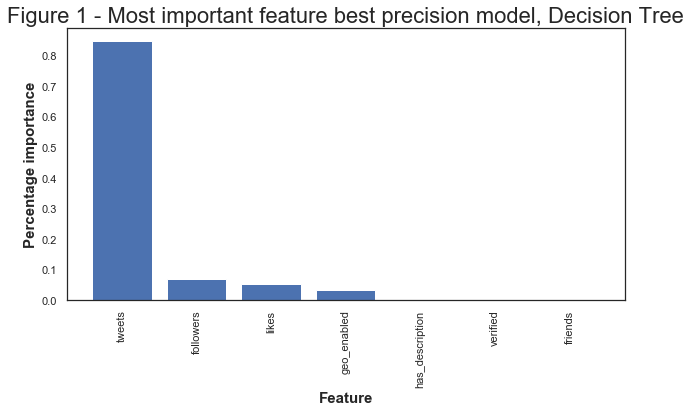

In [18]:
importances = best.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [labels[i] for i in indices]

# Plot
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white")
plt.figure()
plt.title('Figure 1 - Most important feature best precision model, Decision Tree', fontsize=22)
plt.ylabel('Percentage importance', fontsize=15, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.bar(range(train_features.shape[1]),importances[indices])
plt.xticks(range(train_features.shape[1]), names, rotation=90)
plt.show()

[[2199  175]
 [ 481 8290]]


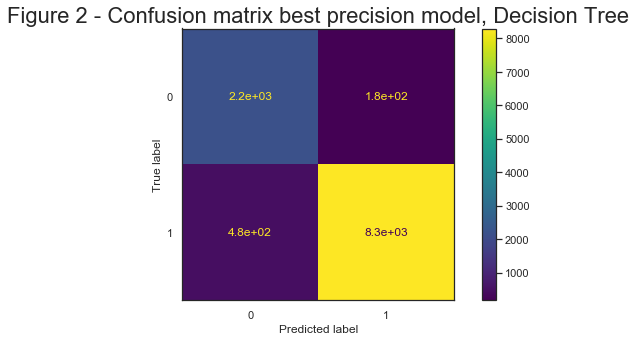

In [17]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve, precision_recall_curve

#Predict the values of the train
test_pred=best.predict(test_features)

#Plot the confusion matrix
plot_confusion_matrix(best,test_features,test_target)
plt.title('Figure 2 - Confusion matrix best precision model, Decision Tree', fontsize=22)
print(metrics.confusion_matrix(test_target, test_pred))

In [16]:
#Get the metrics for the Decision Tree model
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(metrics.accuracy_score(test_target, test_pred),
                                                                           metrics.precision_score(test_target, test_pred),
                                                                           metrics.recall_score(test_target, test_pred),
                                                                           metrics.f1_score(test_target, test_pred)
                                                                          ))

Accuracy:	0.9411395244504261
Precision:	0.9793266391021854
Recall:		0.9451601869798198
F1 Score:	0.9619401253190994



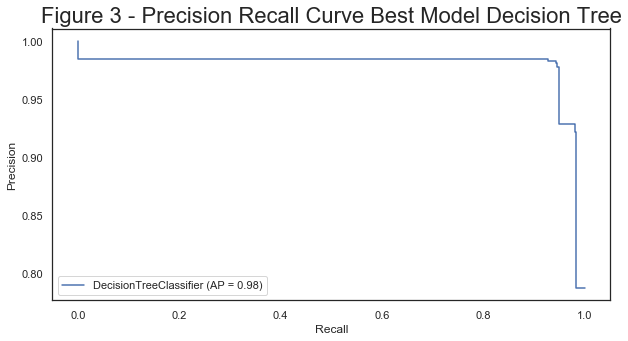

In [17]:
#Plot Precision Recall curve best model decision tree
plot_precision_recall_curve(best,test_features,test_target)
plt.title('Figure 3 - Precision Recall Curve Best Model Decision Tree', fontsize=22)
plt.show()